#### Data Import

In [3]:
import pandas as pd

# Import the cleaned data
df_cleaned = pd.read_csv('C:/Users/mahmu/Downloads/DataAnalyticsProjects/Employee Retention Analysis/cleaned_data.csv')

df_cleaned.head()

,id,firm,date_review,job_title,current,location,overall_rating,work_life_balance,culture_values,diversity_inclusion,...,ceo_approv,outlook,headline,pros,cons,company_size,sentimental_score,review_year,review_month,experience_level
0,1,AFH-Wealth-Management,2015-04-05,,Current Employee,unknown,2.0,4.0,3.0,4,...,o,r,"Young colleagues, poor micro management",Very friendly and welcoming to new staff. Easy...,"Poor salaries, poor training and communication.",Mid-Size,1.0,2015,4,Mid-level
1,2,AFH-Wealth-Management,2015-12-11,Office Administrator,"Current Employee, more than 1 year","Bromsgrove, England, England",2.0,3.0,1.0,4,...,o,r,"Excellent staff, poor salary","Friendly, helpful and hard-working colleagues",Poor salary which doesn't improve much with pr...,Mid-Size,-1.0,2015,12,Entry
2,3,AFH-Wealth-Management,2016-01-28,Office Administrator,"Current Employee, less than 1 year","Bromsgrove, England, England",1.0,1.0,1.0,4,...,o,x,"Low salary, bad micromanagement",Easy to get the job even without experience in...,"Very low salary, poor working conditions, very...",Mid-Size,-1.0,2016,1,Entry
3,4,AFH-Wealth-Management,2016-04-16,,Current Employee,unknown,5.0,2.0,3.0,4,...,o,r,Over promised under delivered,Nice staff to work with,No career progression and salary is poor,Mid-Size,-1.0,2016,4,Mid-level
4,5,AFH-Wealth-Management,2016-04-23,Office Administrator,"Current Employee, more than 1 year","Bromsgrove, England, England",1.0,2.0,1.0,4,...,o,x,client reporting admin,"Easy to get the job, Nice colleagues.","Abysmal pay, around minimum wage. No actual tr...",Mid-Size,-1.0,2016,4,Entry


In [4]:
# All Columns
df_cleaned.columns

Index(['id', 'firm', 'date_review', 'job_title', 'current', 'location',
       'overall_rating', 'work_life_balance', 'culture_values',
       'diversity_inclusion', 'career_opp', 'comp_benefits', 'senior_mgmt',
       'recommend', 'ceo_approv', 'outlook', 'headline', 'pros', 'cons',
       'company_size', 'sentimental_score', 'review_year', 'review_month',
       'experience_level'],
      dtype='object')

In [5]:
# values from current column 
df_cleaned['current'].value_counts()

current
Current Employee                           180956
Former Employee                            126248
Current Employee, more than 1 year          79126
Current Employee, more than 3 years         63450
Former Employee, more than 1 year           63347
Current Employee, less than 1 year          47717
Former Employee, more than 3 years          41806
Former Employee, less than 1 year           40709
Current Employee, more than 5 years         38202
Current Employee, more than 10 years        23520
Former Employee, more than 5 years          22046
Current Employee, more than 8 years         17639
Former Employee, more than 10 years         14580
Former Employee, more than 8 years          10231
Former Contractor, less than 1 year             6
Former Intern, less than 1 year                 4
Current Contractor, less than 1 year            3
Current Contractor, more than 1 year            3
Former Contractor                               2
Former Intern                             

#### Reviewer Status Column

In [6]:
import numpy as np

# Create reviewer_status column
df_cleaned['reviewer_status'] = np.where(
    df_cleaned['current'].str.contains('Former', case=False, na=False), 'Former Employee', 'Current Employee'
)

# value count of reviewer_status column
df_cleaned['reviewer_status'].value_counts()

reviewer_status
Current Employee    450620
Former Employee     318988
Name: count, dtype: int64

The 'reviewer_status' column is created to separate Current and Former employees so that the Retention Label can be separated. 

#### Retention Label column

In [7]:
import numpy as np

# Logic to create the retention_label column 
df_cleaned['retention_label'] = np.where(
    (df_cleaned['reviewer_status'] == 'Former Employee'), 0, 
    np.where(
    (df_cleaned['overall_rating'] <= 3) &
    (df_cleaned['work_life_balance'] <= 3) &
    (df_cleaned['comp_benefits'] <= 3) &
    (df_cleaned['senior_mgmt'] <= 3) &
    (df_cleaned['career_opp'] <= 3) &
    (df_cleaned['sentimental_score'] == -1), 
    0, # Likely to leave
    1  # Likely to stay
    )
)

Former Employees have already left the companies, My target is to find those Current Employees who might leave the companies; that's why the logic of creating the 'retention_label' column is like that. 

In [8]:
# Grouped by retention_label
df_cleaned['retention_label'].value_counts()

retention_label
1    407294
0    362314
Name: count, dtype: int64

In [9]:
df_cleaned.columns

Index(['id', 'firm', 'date_review', 'job_title', 'current', 'location',
       'overall_rating', 'work_life_balance', 'culture_values',
       'diversity_inclusion', 'career_opp', 'comp_benefits', 'senior_mgmt',
       'recommend', 'ceo_approv', 'outlook', 'headline', 'pros', 'cons',
       'company_size', 'sentimental_score', 'review_year', 'review_month',
       'experience_level', 'reviewer_status', 'retention_label'],
      dtype='object')

In [10]:
# Keep the necessary columns
df = df_cleaned[['id', 'date_review', 'review_year', 'review_month', 'company_size', 'experience_level', 'reviewer_status', 'overall_rating', 
                'work_life_balance', 'career_opp', 'comp_benefits', 'senior_mgmt', 'retention_label']]

df.head()

,id,date_review,review_year,review_month,company_size,experience_level,reviewer_status,overall_rating,work_life_balance,career_opp,comp_benefits,senior_mgmt,retention_label
0,1,2015-04-05,2015,4,Mid-Size,Mid-level,Current Employee,2.0,4.0,2.0,3.0,3.0,1
1,2,2015-12-11,2015,12,Mid-Size,Entry,Current Employee,2.0,3.0,2.0,1.0,4.0,1
2,3,2016-01-28,2016,1,Mid-Size,Entry,Current Employee,1.0,1.0,1.0,1.0,1.0,0
3,4,2016-04-16,2016,4,Mid-Size,Mid-level,Current Employee,5.0,2.0,2.0,2.0,3.0,1
4,5,2016-04-23,2016,4,Mid-Size,Entry,Current Employee,1.0,2.0,2.0,1.0,1.0,0


Keeping only the necessary columns for feature engineering and modeling. 

In [11]:
df.columns

Index(['id', 'date_review', 'review_year', 'review_month', 'company_size',
       'experience_level', 'reviewer_status', 'overall_rating',
       'work_life_balance', 'career_opp', 'comp_benefits', 'senior_mgmt',
       'retention_label'],
      dtype='object')

#### Feature Engineering

In [12]:
# One-hot encoding for company_size
df = pd.get_dummies(df, columns=['company_size'])

To prepare the data for machine learning models, we applied one-hot encoding to the company_size column. This process converts the categorical values into a set of binary (0 or 1) columns, allowing models that require numerical input to interpret the data effectively. We used pandas.get_dummies() to perform this transformation.

In [13]:
df = df.drop('company_size_Small', axis=True)

After applying one-hot encoding to the company_size column, we dropped the company_size_Small column to avoid the dummy variable trap. This ensures there is no multicollinearity among the newly created binary columns, which can negatively impact the performance of certain machine learning models (e.g., linear regression).

In [14]:
from sklearn.preprocessing import LabelEncoder as LE

# Create separate encoder instances
le_exp = LE()
# Apply encoding
df['experience_level'] = le_exp.fit_transform(df['experience_level'])

# Apply mapping
df['reviewer_status'] = df['reviewer_status'].map({
    'Current Employee': 1,
    'Former Employee': 0
})

To convert categorical text data into a numerical format suitable for machine learning models:

i. We used Label Encoding on the experience_level column by creating an instance of LabelEncoder from sklearn.preprocessing. This assigns a unique integer to each category in the column.

ii. We applied manual mapping on the reviewer_status column to convert 'Current Employee' to 1 and 'Former Employee' to 0, effectively transforming it into a binary feature.

In [15]:
df.columns

Index(['id', 'date_review', 'review_year', 'review_month', 'experience_level',
       'reviewer_status', 'overall_rating', 'work_life_balance', 'career_opp',
       'comp_benefits', 'senior_mgmt', 'retention_label', 'company_size_Large',
       'company_size_Mid-Size'],
      dtype='object')

In [16]:
df.head(10)

,id,date_review,review_year,review_month,experience_level,reviewer_status,overall_rating,work_life_balance,career_opp,comp_benefits,senior_mgmt,retention_label,company_size_Large,company_size_Mid-Size
0,1,2015-04-05,2015,4,2,1,2.0,4.0,2.0,3.0,3.0,1,False,True
1,2,2015-12-11,2015,12,0,1,2.0,3.0,2.0,1.0,4.0,1,False,True
2,3,2016-01-28,2016,1,0,1,1.0,1.0,1.0,1.0,1.0,0,False,True
3,4,2016-04-16,2016,4,2,1,5.0,2.0,2.0,2.0,3.0,1,False,True
4,5,2016-04-23,2016,4,0,1,1.0,2.0,2.0,1.0,1.0,0,False,True
5,6,2016-05-26,2016,5,0,1,3.0,4.0,2.0,3.0,2.0,1,False,True
6,7,2016-09-23,2016,9,1,0,1.0,1.0,1.0,1.0,1.0,0,False,True
7,8,2016-09-25,2016,9,2,1,5.0,5.0,5.0,4.0,5.0,1,False,True
8,9,2016-11-03,2016,11,0,0,4.0,4.0,4.0,4.0,4.0,0,False,True
9,10,2017-02-21,2017,2,2,0,1.0,1.0,1.0,3.0,1.0,0,False,True


In [17]:
df.dtypes

id                         int64
date_review               object
review_year                int64
review_month               int64
experience_level           int64
reviewer_status            int64
overall_rating           float64
work_life_balance        float64
career_opp               float64
comp_benefits            float64
senior_mgmt              float64
retention_label            int64
company_size_Large          bool
company_size_Mid-Size       bool
dtype: object

#### Select feature and target

In [18]:
# Define the target
target = 'retention_label'

# Choose the features
features = [
    'review_year',
    'experience_level',
    'overall_rating',
    'work_life_balance',
    'career_opp',
    'comp_benefits',
    'senior_mgmt',
    'company_size_Large',
    'company_size_Mid-Size'
]

X = df[features]
y = df[target]

We defined retention_label as the target variable, representing whether an employee is likely to stay or leave.

We then selected a set of relevant features that may influence employee retention, including review year, experience level, satisfaction metrics (e.g., work-life balance, compensation), and company size indicators.

Using these, we created:

X → the feature matrix containing the selected predictors

y → the target vector containing the labels for prediction

#### Test-Train Split

In [19]:
from sklearn.model_selection import train_test_split

# Split the dataset into 80% training and 20% testing
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

We split the dataset into training and testing sets using an 80/20 ratio. This allows us to train the model on one portion of the data and evaluate its performance on unseen data.
train_test_split() from sklearn.model_selection was used.

stratify=y ensures that the class distribution in the target variable is preserved in both training and testing sets.

random_state=42 was set for reproducibility of the split.

#### Logistic Regression Model

In [20]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix

# Initialize the train model
log_model = LogisticRegression(max_iter=1000)
log_model.fit(X_train, y_train)

# Prediction 
y_pred_log = log_model.predict(X_test)

# Confusion Matrix
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_log))

print()

# Classification report
print("Logistic Regression Classification Report:")
print(classification_report(y_test, y_pred_log))

Confusion Matrix:
[[42251 30212]
 [20456 61003]]

Logistic Regression Classification Report:
              precision    recall  f1-score   support

           0       0.67      0.58      0.63     72463
           1       0.67      0.75      0.71     81459

    accuracy                           0.67    153922
   macro avg       0.67      0.67      0.67    153922
weighted avg       0.67      0.67      0.67    153922



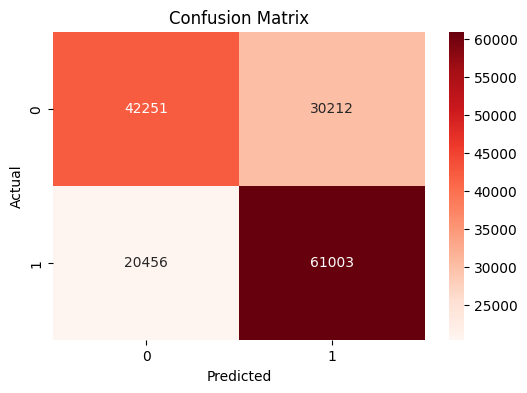

In [21]:
import matplotlib.pyplot as plt
import seaborn as sns 

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred_log)

# Visualize
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True,  fmt='d', cmap='Reds')
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

#### Random Forest Model

In [22]:
from sklearn.ensemble import RandomForestClassifier

rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

y_pred_rf = rf_model.predict(X_test)

# Confusion Matrix
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_rf))

print()

# Classification report
print("Random Forest Classification Report:")
print(classification_report(y_test, y_pred_rf))

Confusion Matrix:
[[49536 22927]
 [10226 71233]]

Random Forest Classification Report:
              precision    recall  f1-score   support

           0       0.83      0.68      0.75     72463
           1       0.76      0.87      0.81     81459

    accuracy                           0.78    153922
   macro avg       0.79      0.78      0.78    153922
weighted avg       0.79      0.78      0.78    153922



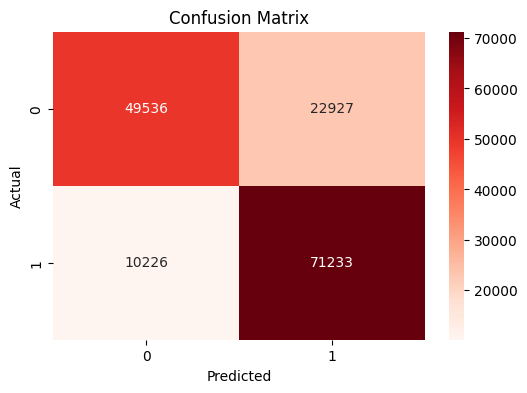

In [23]:
# Confusion Matrix
cm = confusion_matrix(y_test, y_pred_rf)

# Visualize
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True,  fmt='d', cmap='Reds')
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

#### XGBoost Model

In [24]:
from xgboost import XGBClassifier
from sklearn.metrics import classification_report, confusion_matrix

model_xgb = XGBClassifier(eval_metric='logloss')
model_xgb.fit(X_train, y_train)

y_pred_xgb = model_xgb.predict(X_test)
print("Confusion Matrix:") 
print(confusion_matrix(y_test, y_pred_xgb))
print()
print("XGBoost Classification Report:")
print(classification_report(y_test, y_pred_xgb))


Confusion Matrix:
[[48569 23894]
 [ 7502 73957]]

XGBoost Classification Report:
              precision    recall  f1-score   support

           0       0.87      0.67      0.76     72463
           1       0.76      0.91      0.82     81459

    accuracy                           0.80    153922
   macro avg       0.81      0.79      0.79    153922
weighted avg       0.81      0.80      0.79    153922



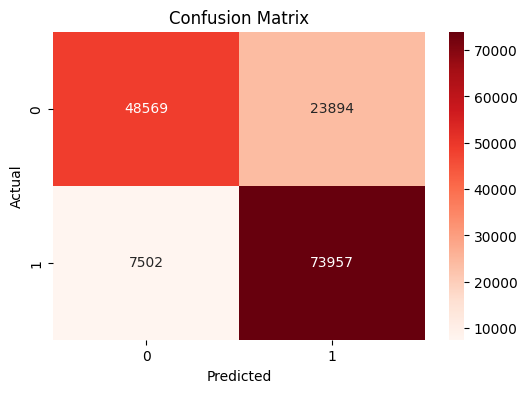

In [25]:
# Confusion Matrix
cm = confusion_matrix(y_test, y_pred_xgb)

# Visualize
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True,  fmt='d', cmap='Reds')
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

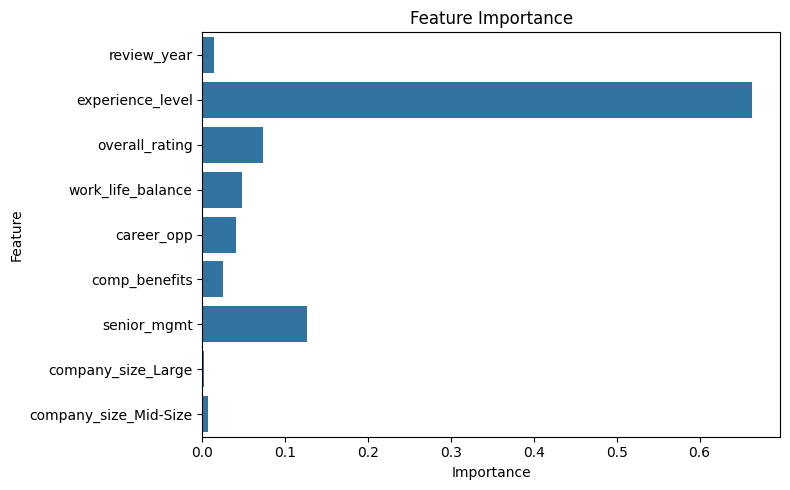

In [26]:
# Plot feature importances
importances = model_xgb.feature_importances_
feature_names = X.columns

plt.figure(figsize=(8, 5))
sns.barplot(x=importances, y=feature_names)
plt.title('Feature Importance')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.tight_layout()
plt.show()

#### Gradient Boosting Model

In [27]:
from sklearn.ensemble import GradientBoostingClassifier

model_gb = GradientBoostingClassifier()
model_gb.fit(X_train, y_train)

y_pred_gb = model_gb.predict(X_test)

print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_gb))
print()
print("Gradient Boosting Classification Report:")
print(classification_report(y_test, y_pred_gb))


Confusion Matrix:
[[49095 23368]
 [ 8688 72771]]

Gradient Boosting Classification Report:
              precision    recall  f1-score   support

           0       0.85      0.68      0.75     72463
           1       0.76      0.89      0.82     81459

    accuracy                           0.79    153922
   macro avg       0.80      0.79      0.79    153922
weighted avg       0.80      0.79      0.79    153922



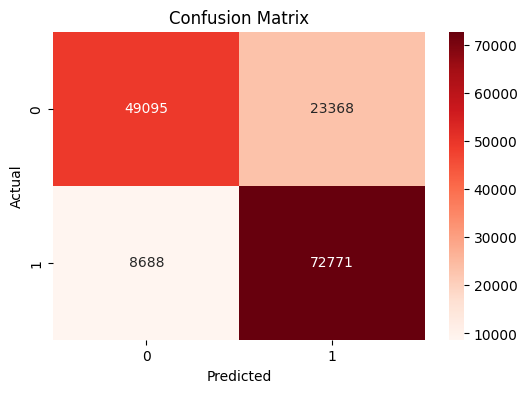

In [28]:
# Confusion Matrix
cm = confusion_matrix(y_test, y_pred_gb)

# Visualize
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True,  fmt='d', cmap='Reds')
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

#### MLPClasssifier Model

In [29]:
from sklearn.neural_network import MLPClassifier

model_mlp = MLPClassifier(max_iter=1000)
model_mlp.fit(X_train, y_train)

y_pred_mlp = model_mlp.predict(X_test)
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_mlp))
print()
print("MLPClassifier Classification Report:")
print(classification_report(y_test, y_pred_mlp))

Confusion Matrix:
[[44234 28229]
 [22923 58536]]

MLPClassifier Classification Report:
              precision    recall  f1-score   support

           0       0.66      0.61      0.63     72463
           1       0.67      0.72      0.70     81459

    accuracy                           0.67    153922
   macro avg       0.67      0.66      0.66    153922
weighted avg       0.67      0.67      0.67    153922



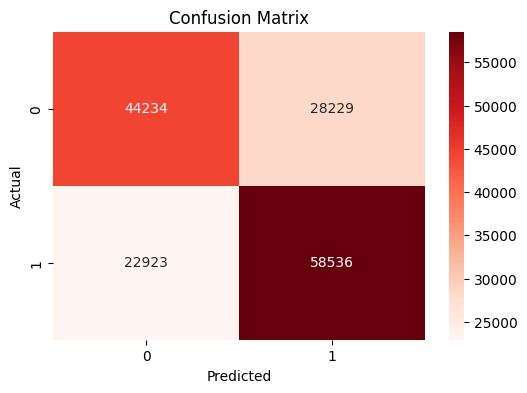

In [30]:
# Confusion Matrix
cm = confusion_matrix(y_test, y_pred_mlp)

# Visualize
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True,  fmt='d', cmap='Reds')
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

#### Decision Tree Model

In [31]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, confusion_matrix

# Initialize and train the model
dt_model = DecisionTreeClassifier(random_state=42, max_depth=10) 
dt_model.fit(X_train, y_train)

# Evaluate
y_pred_dt = dt_model.predict(X_test)
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_dt))
print()
print("Decision Tree Classification Report:")
print(classification_report(y_test, y_pred_dt))

Confusion Matrix:
[[48603 23860]
 [ 7679 73780]]

Decision Tree Classification Report:
              precision    recall  f1-score   support

           0       0.86      0.67      0.76     72463
           1       0.76      0.91      0.82     81459

    accuracy                           0.80    153922
   macro avg       0.81      0.79      0.79    153922
weighted avg       0.81      0.80      0.79    153922



After trying multiple models, I am finalizing this model because of its balance between predictive performance and interpretability. 

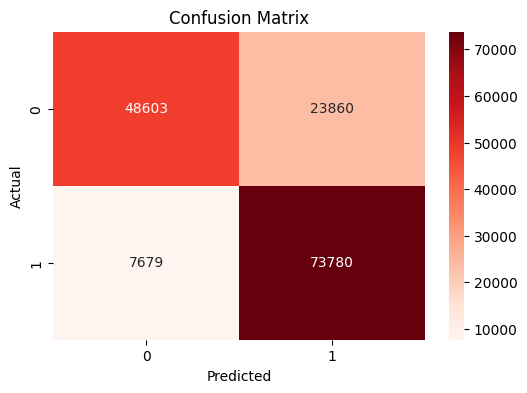

In [32]:
# Confusion Matrix
cm = confusion_matrix(y_test, y_pred_dt)

# Visualize
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True,  fmt='d', cmap='Reds')
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

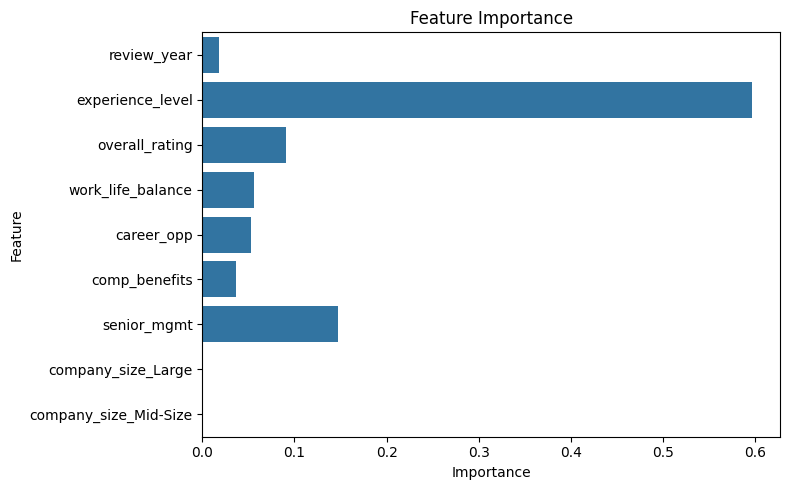

In [33]:
# Plot feature importances
importances = dt_model.feature_importances_
feature_names = X.columns

plt.figure(figsize=(8, 5))
sns.barplot(x=importances, y=feature_names)
plt.title('Feature Importance')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.tight_layout()
plt.show()

'experience_level' was the most influential predictor of retention, followed by 'senior_mgmt' and 'overall_rating'. This suggests that more experienced employees are more likely to stay or leave depending on their satisfaction with senior management and their overall perception of the organization.

In [34]:
print(feature_names, importances)

Index(['review_year', 'experience_level', 'overall_rating',
       'work_life_balance', 'career_opp', 'comp_benefits', 'senior_mgmt',
       'company_size_Large', 'company_size_Mid-Size'],
      dtype='object') [1.76170508e-02 5.97326887e-01 9.10284206e-02 5.62445306e-02
 5.30899552e-02 3.62314420e-02 1.47710402e-01 2.71213021e-04
 4.80098807e-04]


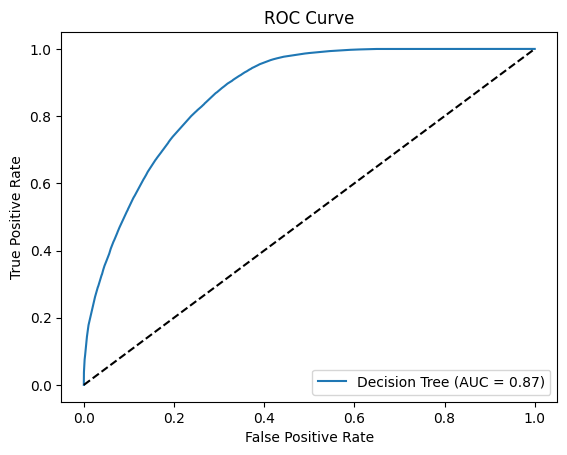

In [35]:
from sklearn.metrics import roc_curve, auc

y_probs = dt_model.predict_proba(X_test)[:,1]
fpr, tpr, _ = roc_curve(y_test, y_probs)
roc_auc = auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, label=f'Decision Tree (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.show()


The ROC curve demonstrates the model’s ability to distinguish between the two classes. The curve rises quickly toward the top-left corner, indicating a high true positive rate and a low false positive rate across various thresholds. The area under the curve (AUC) is 0.87, which confirms the model’s robustness in binary classification tasks.

In [36]:
# Predict only for current employees
current_employees = df[df['reviewer_status'] == 1].copy()
X_current = current_employees[features]

# Prediction for current employees
current_employees['dt_pred'] = dt_model.predict(X_current)
current_employees['dt_prob'] = dt_model.predict_proba(X_current)[:, 1]

current_employees[['id', 'dt_pred', 'dt_prob']].head(10)

,id,dt_pred,dt_prob
0,1,1,0.842040
1,2,0,0.495465
2,3,0,0.040964
3,4,1,0.836875
4,5,0,0.040964
5,6,1,0.544161
7,8,1,0.865554
10,11,0,0.040964
12,13,1,0.864865
14,15,1,0.865554


In [37]:
# Current Employees
print("Number of Current Employees:", len(current_employees))

# Current Employees Likely to Stay
staying_employees = current_employees[current_employees['dt_pred']==1]
print("\nNumber of current employees likely to stay in the companies:", len(staying_employees))

# Current Employees Likely to Leave 
leaving_employees = current_employees[current_employees['dt_pred']==0]
print("\nNumber of current employees likely to leave the companies:", len(leaving_employees))

Number of Current Employees: 450620

Number of current employees likely to stay in the companies: 369467

Number of current employees likely to leave the companies: 81153


In [42]:
staying_percentage = (len(staying_employees)/ len(current_employees))*100
leaving_percentage = (len(leaving_employees)/ len(current_employees))*100
print(f"{staying_percentage: .2f}% employees might stay in the companies &{leaving_percentage: .2f}% might leave.")

 81.99% employees might stay in the companies & 18.01% might leave.


#### Merge of multiple models

In [39]:
from sklearn.ensemble import VotingClassifier

# Initialize models
xgb = XGBClassifier(eval_metric='logloss', random_state=42)
gb_model = GradientBoostingClassifier(n_estimators=100, learning_rate=0.1, max_depth=3, random_state=42)
dtree = DecisionTreeClassifier(random_state=42)

# Create Voting Classifier 
voting_clf = VotingClassifier(
    estimators=[('xgb', xgb),('gradient_boosting', gb_model), ('dt', dtree)],
    voting='soft'
)

# Train the voting classifier
voting_clf.fit(X_train, y_train)

# Predict on test data
y_pred_voting_clf = voting_clf.predict(X_test)

# Evaluate performance
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_voting_clf))

print("\nVoting Classifier Classification Report:")
print(classification_report(y_test, y_pred_voting_clf))


Confusion Matrix:
[[48989 23474]
 [ 8617 72842]]

Voting Classifier Classification Report:
              precision    recall  f1-score   support

           0       0.85      0.68      0.75     72463
           1       0.76      0.89      0.82     81459

    accuracy                           0.79    153922
   macro avg       0.80      0.79      0.79    153922
weighted avg       0.80      0.79      0.79    153922

